# Intro

In this notebook, I read all the result files from each competitor method to create a summary figure.
The metrics I use are RMSE and Pearson correlation on the expression and log2FC.
The experiments I perform comparisons on are: None stimulated, All stimulated, cell-type specific stimulation

In [1]:
# general imports
import warnings
import numpy as np
from scipy.stats import spearmanr, pearsonr, ttest_ind, wilcoxon


# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# programming stuff
import time
import os
import pickle
from pathlib import Path

# import the SC_preprocessing code
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from sc_preprocessing import sc_preprocess
from method_comparison import validation_plotting as vp


In [2]:
## parameters
res_data_path = f"{os.getcwd()}/../../results/single_cell_data/buddiM2_liver/"

# cibersort results
cibersort_file_path = f"{os.getcwd()}/../../results/single_cell_data/cibersort_kang/CIBERSORTx_Job18_Results.csv"


In [3]:
exp_type = "all-liver"

buddi_file = os.path.join(res_data_path, f"BuDDI_auprc.csv")
pca_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/PCA_liver/", f"PCA_auprc.csv")
cvae_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/CVAE_liver/", f"CVAE_auprc.csv")

buddi_df = pd.read_csv(buddi_file, sep=",")

pca_df = pd.read_csv(pca_file, sep=",")


cvae_df = pd.read_csv(cvae_file, sep=",")


plot_df = pd.concat([buddi_df, pca_df, cvae_df])




In [4]:
plot_df.method.value_counts()

random    84
bulk      84
zero      48
BuDDI     36
CVAE      36
PCA       12
Name: method, dtype: int64

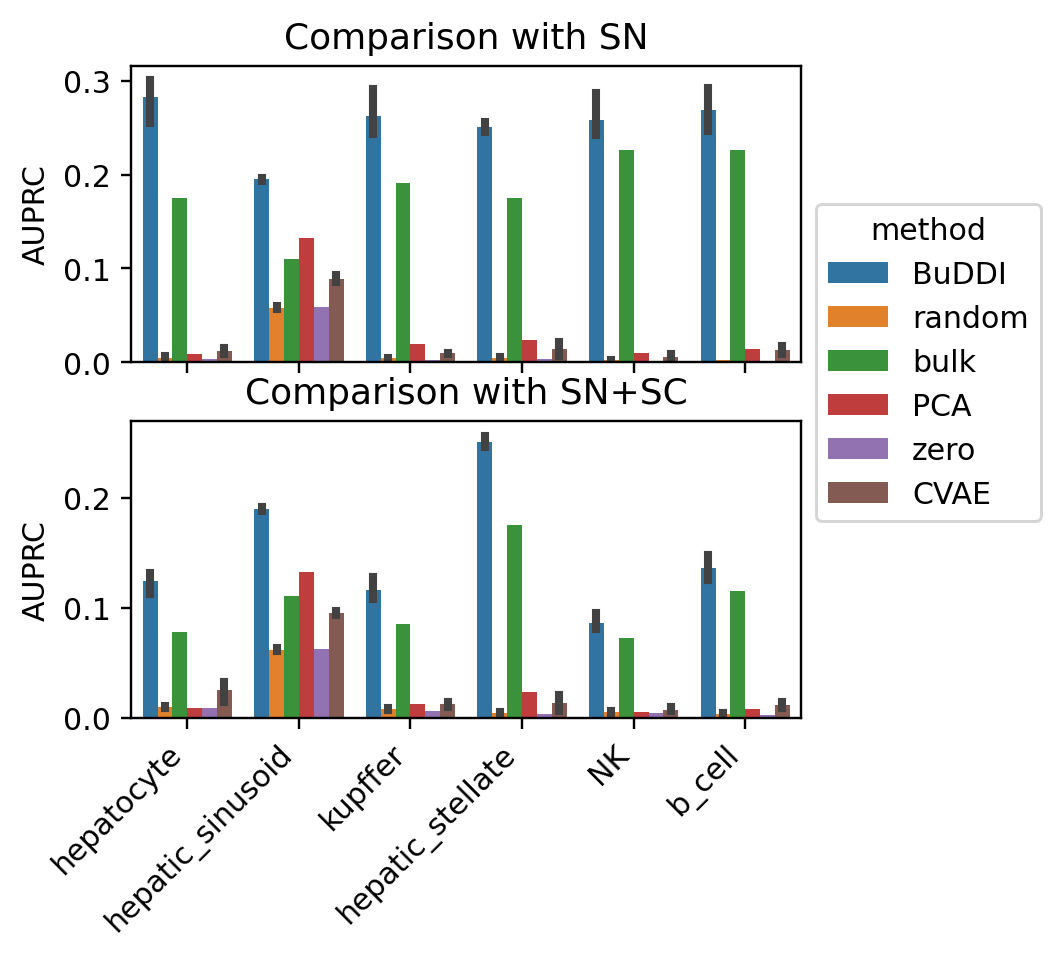

In [5]:

# plot
fig, axs = plt.subplots(2, 1, figsize=(4,4), dpi=216)

sns.barplot(data=plot_df[plot_df["ref_set"] == "sn"], 
            x="cell_type", y="scores",
            hue="method", ax= axs[0])
axs[0].set_title("Comparison with SN")
axs[0].set(ylabel="AUPRC", xlabel="")
axs[0].set_xticklabels([])


sns.barplot(data=plot_df[plot_df["ref_set"] == "sc_sn"], 
            x="cell_type", y="scores",
            hue="method", ax= axs[1])
axs[1].set_title("Comparison with SN+SC")
axs[1].set(ylabel="AUPRC", xlabel="")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, horizontalalignment='right')
axs[1].get_legend().remove()


sns.move_legend(axs[0], "center left", bbox_to_anchor=(1, 0))


fig.show()

